In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-1000

Dataset URL: https://www.kaggle.com/datasets/arnaudeq/cats-vs-dogs-1000
License(s): unknown
 99% 175M/177M [00:07<00:00, 22.3MB/s]
100% 177M/177M [00:07<00:00, 23.6MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-vs-dogs-1000.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import UnidentifiedImageError, Image
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [9]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_cats_sample_1000/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.


In [10]:
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs_cats_sample_1000/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 2000 files belonging to 2 classes.


In [11]:
#normalise
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [15]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
def ANk():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=64, kernel_size=(3,3),padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),padding='valid', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2), strides=2,padding='valid'))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(units=64, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(units=1, activation='sigmoid'))  # For binary classification

    # Compile the model
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model
model=ANk()

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [17]:
history=model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
63/63 [==============================] - 18s 177ms/step - loss: 6.4296 - accuracy: 0.5440 - val_loss: 16.9692 - val_accuracy: 0.5010
Epoch 2/10
63/63 [==============================] - 9s 133ms/step - loss: 2.4185 - accuracy: 0.5465 - val_loss: 1.3784 - val_accuracy: 0.5300
Epoch 3/10
63/63 [==============================] - 11s 169ms/step - loss: 1.1582 - accuracy: 0.5550 - val_loss: 0.8870 - val_accuracy: 0.5140
Epoch 4/10
63/63 [==============================] - 11s 169ms/step - loss: 0.8841 - accuracy: 0.5515 - val_loss: 1.3786 - val_accuracy: 0.5060
Epoch 5/10
63/63 [==============================] - 9s 139ms/step - loss: 0.7444 - accuracy: 0.5690 - val_loss: 0.8047 - val_accuracy: 0.5755
Epoch 6/10
63/63 [==============================] - 9s 144ms/step - loss: 0.6814 - accuracy: 0.6035 - val_loss: 0.7279 - val_accuracy: 0.5360
Epoch 7/10
63/63 [==============================] - 11s 169ms/step - loss: 0.6883 - accuracy: 0.6180 - val_loss: 0.7226 - val_accuracy: 0.5395
E

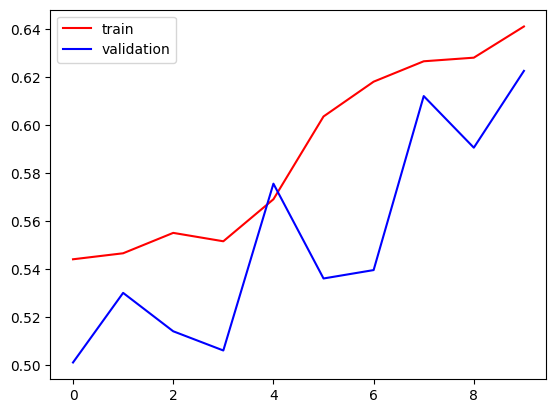

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red',label='train')
plt.plot(history.history['val_accuracy'], color='blue',label='validation')
plt.legend()
plt.show()

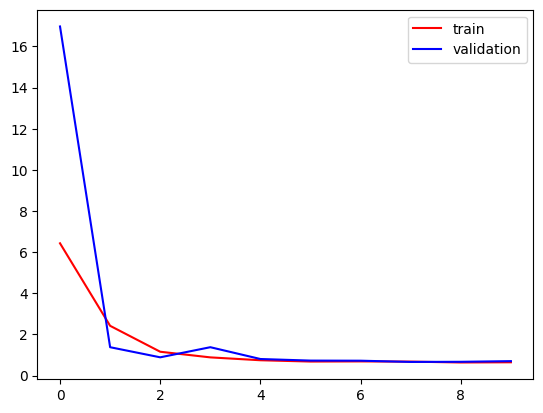

In [19]:
plt.plot(history.history['loss'], color='red',label='train')
plt.plot(history.history['val_loss'], color='blue',label='validation')
plt.legend()
plt.show()